In [1]:
# import libraries

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plot we will create


# LOADING DATA

In [2]:
# LOADING DATA
# reading the file

# Specify the path to your Excel file
excel_file_path = r'C:\Users\Asad Ameen\Desktop\docxtpl\reports\Machine_Learning\life_expectancy.csv'

# Use pandas to read the Excel file
df = pd.read_csv(excel_file_path)

# Display the first few rows of the DataFrame to verify the data
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


# Data Cleaning

In [3]:
# Check for missing data in the entire DataFrame
missing_data = df.isnull().sum()

# Display the missing data count for each column
print(missing_data)

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [4]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing data percentages
missing_data_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
})

# Sort the DataFrame by missing percentage in descending order
missing_data_summary = missing_data_summary.sort_values(by='Missing Percentage', ascending=False)

# Display the missing data summary
print(missing_data_summary)

                                                        Column  \
Corruption                                          Corruption   
Sanitation                                          Sanitation   
Education Expenditure %                Education Expenditure %   
Prevelance of Undernourishment  Prevelance of Undernourishment   
Unemployment                                      Unemployment   
Life Expectancy World Bank          Life Expectancy World Bank   
Health Expenditure %                      Health Expenditure %   
CO2                                                        CO2   
Country Name                                      Country Name   
Country Code                                      Country Code   
Region                                                  Region   
IncomeGroup                                        IncomeGroup   
Year                                                      Year   
Injuries                                              Injuries   
Communicab

In [5]:
# Check data types of each column
df.dtypes

Country Name                       object
Country Code                       object
Region                             object
IncomeGroup                        object
Year                                int64
Life Expectancy World Bank        float64
Prevelance of Undernourishment    float64
CO2                               float64
Health Expenditure %              float64
Education Expenditure %           float64
Unemployment                      float64
Corruption                        float64
Sanitation                        float64
Injuries                          float64
Communicable                      float64
NonCommunicable                   float64
dtype: object

In [6]:
# Find rows where a specific country exists in any column
value_to_find = 'Pakistan'
matching_rows = df[df.apply(lambda row: value_to_find in row.values, axis=1)]

# Display the matching rows as a DataFrame
matching_dataframe = pd.DataFrame(matching_rows)

# Display the rows where the value is found
matching_dataframe

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
123,Pakistan,PAK,South Asia,Lower middle income,2001,63.066,21.1,99840.000000,2.706671,NaN,0.565,NaN,NaN,4281933.12,58084619.18,27319818.25
297,Pakistan,PAK,South Asia,Lower middle income,2002,63.300,21.8,102330.001831,2.827049,NaN,0.548,NaN,NaN,4368968.33,58257369.24,28014960.73
471,Pakistan,PAK,South Asia,Lower middle income,2003,63.522,21.0,105660.003662,2.431379,NaN,0.590,NaN,NaN,4453982.47,58252314.37,28672597.35
645,Pakistan,PAK,South Asia,Lower middle income,2004,63.736,19.0,118650.001526,2.347227,1.76759,0.613,NaN,NaN,4516245.25,58001920.93,29322560.91
819,Pakistan,PAK,South Asia,Lower middle income,2005,63.951,17.6,121669.998169,2.707937,2.04972,0.593,2.5,NaN,9169537.74,57243295.55,29945847.70
993,Pakistan,PAK,South Asia,Lower middle income,2006,64.176,16.4,132479.995728,3.007171,2.39551,0.580,2.5,NaN,4685353.17,57126270.42,30564876.99
1167,Pakistan,PAK,South Asia,Lower middle income,2007,64.420,15.8,146259.994507,3.138228,2.63527,0.400,2.5,NaN,4871921.78,56034532.10,31054923.04
1341,Pakistan,PAK,South Asia,Lower middle income,2008,64.685,15.8,142160.003662,2.923122,2.74623,0.420,2.5,NaN,5222863.23,55233664.11,32020753.29
1515,Pakistan,PAK,South Asia,Lower middle income,2009,64.969,15.6,145139.999390,2.613312,2.59078,0.540,2.5,NaN,5555695.36,54489186.04,32792807.62
1689,Pakistan,PAK,South Asia,Lower middle income,2010,65.264,15.4,140619.995117,2.596758,2.28687,0.650,2.5,NaN,6011592.75,54309381.79,33497999.47


In [7]:
# Check for missing data for that specific value
missing_data_specific_country = matching_dataframe.isnull().sum()

# Display the missing data count for that specific value in each column
print(missing_data_specific_country)

Country Name                       0
Country Code                       0
Region                             0
IncomeGroup                        0
Year                               0
Life Expectancy World Bank         0
Prevelance of Undernourishment     0
CO2                                0
Health Expenditure %               0
Education Expenditure %            4
Unemployment                       0
Corruption                         4
Sanitation                        19
Injuries                           0
Communicable                       0
NonCommunicable                    0
dtype: int64


In [8]:
mean_value_Education = matching_dataframe['Education Expenditure %'].mean()
matching_dataframe['Education Expenditure %'].fillna(mean_value_Education, inplace=True)  # Fill with mean value Education
mean_value_Corruption = matching_dataframe['Corruption'].mean()
matching_dataframe['Corruption'].fillna(mean_value_Corruption, inplace=True)  # Fill with mean value Corruption
mean_value_Sanitation = matching_dataframe['Sanitation'].mean()
matching_dataframe['Sanitation'].fillna(mean_value_Sanitation, inplace=True)  # Fill with mean value Sanitation

In [9]:
# Display the table after updation
matching_dataframe

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
123,Pakistan,PAK,South Asia,Lower middle income,2001,63.066,21.1,99840.000000,2.706671,2.456625,0.565,2.666667,NaN,4281933.12,58084619.18,27319818.25
297,Pakistan,PAK,South Asia,Lower middle income,2002,63.300,21.8,102330.001831,2.827049,2.456625,0.548,2.666667,NaN,4368968.33,58257369.24,28014960.73
471,Pakistan,PAK,South Asia,Lower middle income,2003,63.522,21.0,105660.003662,2.431379,2.456625,0.590,2.666667,NaN,4453982.47,58252314.37,28672597.35
645,Pakistan,PAK,South Asia,Lower middle income,2004,63.736,19.0,118650.001526,2.347227,1.767590,0.613,2.666667,NaN,4516245.25,58001920.93,29322560.91
819,Pakistan,PAK,South Asia,Lower middle income,2005,63.951,17.6,121669.998169,2.707937,2.049720,0.593,2.500000,NaN,9169537.74,57243295.55,29945847.70
993,Pakistan,PAK,South Asia,Lower middle income,2006,64.176,16.4,132479.995728,3.007171,2.395510,0.580,2.500000,NaN,4685353.17,57126270.42,30564876.99
1167,Pakistan,PAK,South Asia,Lower middle income,2007,64.420,15.8,146259.994507,3.138228,2.635270,0.400,2.500000,NaN,4871921.78,56034532.10,31054923.04
1341,Pakistan,PAK,South Asia,Lower middle income,2008,64.685,15.8,142160.003662,2.923122,2.746230,0.420,2.500000,NaN,5222863.23,55233664.11,32020753.29
1515,Pakistan,PAK,South Asia,Lower middle income,2009,64.969,15.6,145139.999390,2.613312,2.590780,0.540,2.500000,NaN,5555695.36,54489186.04,32792807.62
1689,Pakistan,PAK,South Asia,Lower middle income,2010,65.264,15.4,140619.995117,2.596758,2.286870,0.650,2.500000,NaN,6011592.75,54309381.79,33497999.47


In [10]:
# Check for missing data for that specific value after updation with mean values
missing_data_specific_country_1 = matching_dataframe.isnull().sum()

# Display the missing data count for that specific value in each column after updation with mean values
print(missing_data_specific_country_1)

Country Name                       0
Country Code                       0
Region                             0
IncomeGroup                        0
Year                               0
Life Expectancy World Bank         0
Prevelance of Undernourishment     0
CO2                                0
Health Expenditure %               0
Education Expenditure %            0
Unemployment                       0
Corruption                         0
Sanitation                        19
Injuries                           0
Communicable                       0
NonCommunicable                    0
dtype: int64


In [11]:
# Define the columns we want to fill with the mean for whole data frame
columns_to_fill = ['Life Expectancy World Bank','Prevelance of Undernourishment','CO2','Health Expenditure %',
                   'Education Expenditure %',
                   'Unemployment',
                   'Corruption',
                   'Sanitation'
]

df1 = df

# Group by 'Country Code' and fill null values in each group in each column with the mean of that group
for column in columns_to_fill:
    df1[column] = df1.groupby('Country Code')[column].transform(lambda x: x.fillna(x.mean()))

# Display the DataFrame with filled values
df1

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,10.223393,3.301720,10.809000,2.035714,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,2.866503,4.004000,2.500000,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.458700,18.575001,2.750000,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,2.680696,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,3.867370,2.493000,NaN,84.095296,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.777880,1.801000,3.000000,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.706250,8.406000,4.000000,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.917710,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.465180,12.520000,2.500000,NaN,510982.75,4837094.00,2649687.82


In [12]:
# Check for missing data in the entire DataFrame after updating with mean of that country in whole data frame
missing_data_1 = df1.isnull().sum()

# Display the missing data count for each column
print(missing_data_1)

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         152
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               133
Education Expenditure %            171
Unemployment                       304
Corruption                        1900
Sanitation                        1235
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [13]:
# Find rows where a specific value exists in any column
value_to_find_1 = 'Andorra'
matching_rows_1 = df1[df1.apply(lambda row: value_to_find_1 in row.values, axis=1)]

# Display the matching rows as a DataFrame
matching_dataframe_1 = pd.DataFrame(matching_rows_1)

# Display the rows where the value is found
matching_dataframe_1

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,2.680696,NaN,NaN,21.788660,1697.99,695.56,13636.64
177,Andorra,AND,Europe & Central Asia,High income,2002,NaN,NaN,529.999971,6.098399,1.659710,NaN,NaN,28.973285,1713.57,700.70,13964.72
351,Andorra,AND,Europe & Central Asia,High income,2003,NaN,NaN,529.999971,5.639918,2.680696,NaN,NaN,36.157908,1825.54,750.28,14724.44
525,Andorra,AND,Europe & Central Asia,High income,2004,NaN,NaN,560.000002,5.381253,1.544120,NaN,NaN,43.342536,1936.08,791.99,15446.03
699,Andorra,AND,Europe & Central Asia,High income,2005,NaN,NaN,579.999983,5.739886,1.644970,NaN,NaN,50.527157,1972.26,810.79,15749.49
873,Andorra,AND,Europe & Central Asia,High income,2006,NaN,NaN,550.000012,5.064504,2.244900,NaN,NaN,57.711784,2028.94,832.08,16247.67
1047,Andorra,AND,Europe & Central Asia,High income,2007,NaN,NaN,540.000021,5.028323,2.104690,NaN,NaN,64.896406,2064.27,845.30,16680.55
1221,Andorra,AND,Europe & Central Asia,High income,2008,NaN,NaN,540.000021,5.785686,2.873930,NaN,NaN,72.081036,2085.56,851.77,17074.35
1395,Andorra,AND,Europe & Central Asia,High income,2009,NaN,NaN,519.999981,6.239577,3.142920,NaN,NaN,79.265659,2075.70,848.54,17329.91
1569,Andorra,AND,Europe & Central Asia,High income,2010,NaN,NaN,519.999981,6.580060,2.976630,NaN,NaN,86.450284,2073.89,839.87,17588.81


In [14]:
# Check for missing data for that specific country after updating with mean
missing_data_specific_country_2 = matching_dataframe_1.isnull().sum()

# Display the missing data count for that specific value in each column
print(missing_data_specific_country_2)

Country Name                       0
Country Code                       0
Region                             0
IncomeGroup                        0
Year                               0
Life Expectancy World Bank        19
Prevelance of Undernourishment    19
CO2                                0
Health Expenditure %               0
Education Expenditure %            0
Unemployment                      19
Corruption                        19
Sanitation                         0
Injuries                           0
Communicable                       0
NonCommunicable                    0
dtype: int64


In [15]:
# # Get the unique values from 'Country Name' and sort them
# unique_values = df1['Country Name'].unique()
# unique_values.sort()

# # Create a custom sorting order based on the unique values of Country Name
# sorting_order = {value: index for index, value in enumerate(unique_values)}

# # Use the custom sorting order to sort the DataFrame
# df1['SortOrder'] = df1['Country Name'].map(sorting_order)
# df1_sorted = df1.sort_values(by='SortOrder').drop('SortOrder', axis=1)

# # Display the sorted DataFrame
# df1_sorted

In [16]:
df2 = df1

# Sort the DataFrame by 'Country' (ascending) and 'Year' (ascending)
df2_sorted = df2.sort_values(by=['Country Name', 'Year'])

df2_sorted

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,10.223393,3.301720,10.809,2.035714,NaN,2179727.10,9689193.70,5795426.38
174,Afghanistan,AFG,South Asia,Low income,2002,56.784,45.6,1029.999971,9.443390,3.301720,11.257,2.035714,NaN,1946983.65,9858324.98,5871595.71
348,Afghanistan,AFG,South Asia,Low income,2003,57.271,40.6,1220.000029,8.941258,3.301720,11.141,2.035714,NaN,1992263.52,9157600.44,6166298.79
522,Afghanistan,AFG,South Asia,Low income,2004,57.772,38.0,1029.999971,9.808474,3.301720,10.988,2.035714,NaN,2050765.02,8791000.56,6315336.43
696,Afghanistan,AFG,South Asia,Low income,2005,58.290,36.1,1549.999952,9.948290,2.570000,11.217,2.035714,NaN,2157481.76,8555405.22,6353575.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2015,59.534,NaN,12430.000305,7.452066,5.812790,4.778,2.000000,27.175842,558777.68,4914787.34,2183134.86
2783,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2016,60.294,NaN,11020.000458,7.675163,5.472620,4.788,2.000000,26.877909,576934.87,4705251.43,2231062.45
2957,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2017,60.812,NaN,10340.000153,7.469752,5.818780,4.785,2.000000,26.576824,602042.89,4521261.68,2272515.94
3131,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2018,61.195,NaN,12380.000114,8.680062,3.866110,4.796,2.500000,26.272073,595808.24,4303993.57,2314452.55


In [17]:
# Replace Null values with 0.0001 constant for analysis purpose and keeping their impact very low on over all analysis 
df3 = df2_sorted
df3['Life Expectancy World Bank'].fillna(0.0001, inplace=True)
df3['Prevelance of Undernourishment'].fillna(0.0001, inplace=True)
df3['CO2'].fillna(0.0001, inplace=True)
df3['Health Expenditure %'].fillna(0.0001, inplace=True)
df3['Education Expenditure %'].fillna(0.0001, inplace=True)
df3['Unemployment'].fillna(0.0001, inplace=True)
df3['Corruption'].fillna(0.0001, inplace=True)
df3['Sanitation'].fillna(0.0001, inplace=True)

# Display dataframe after all Null Values that had no value within a country at all were replaced by a constant
# value '-1'
df3

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8000,730.000000,10.223393,3.301720,10.809,2.035714,0.000100,2179727.10,9689193.70,5795426.38
174,Afghanistan,AFG,South Asia,Low income,2002,56.784,45.6000,1029.999971,9.443390,3.301720,11.257,2.035714,0.000100,1946983.65,9858324.98,5871595.71
348,Afghanistan,AFG,South Asia,Low income,2003,57.271,40.6000,1220.000029,8.941258,3.301720,11.141,2.035714,0.000100,1992263.52,9157600.44,6166298.79
522,Afghanistan,AFG,South Asia,Low income,2004,57.772,38.0000,1029.999971,9.808474,3.301720,10.988,2.035714,0.000100,2050765.02,8791000.56,6315336.43
696,Afghanistan,AFG,South Asia,Low income,2005,58.290,36.1000,1549.999952,9.948290,2.570000,11.217,2.035714,0.000100,2157481.76,8555405.22,6353575.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2015,59.534,0.0001,12430.000305,7.452066,5.812790,4.778,2.000000,27.175842,558777.68,4914787.34,2183134.86
2783,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2016,60.294,0.0001,11020.000458,7.675163,5.472620,4.788,2.000000,26.877909,576934.87,4705251.43,2231062.45
2957,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2017,60.812,0.0001,10340.000153,7.469752,5.818780,4.785,2.000000,26.576824,602042.89,4521261.68,2272515.94
3131,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2018,61.195,0.0001,12380.000114,8.680062,3.866110,4.796,2.500000,26.272073,595808.24,4303993.57,2314452.55


In [18]:
# Check for missing data after updating with constant value
missing_data_specific_country_3 = df3.isnull().sum()

# Display the missing data count for that specific value in each column
print(missing_data_specific_country_3)

Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Corruption                        0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64


# Data Analysis

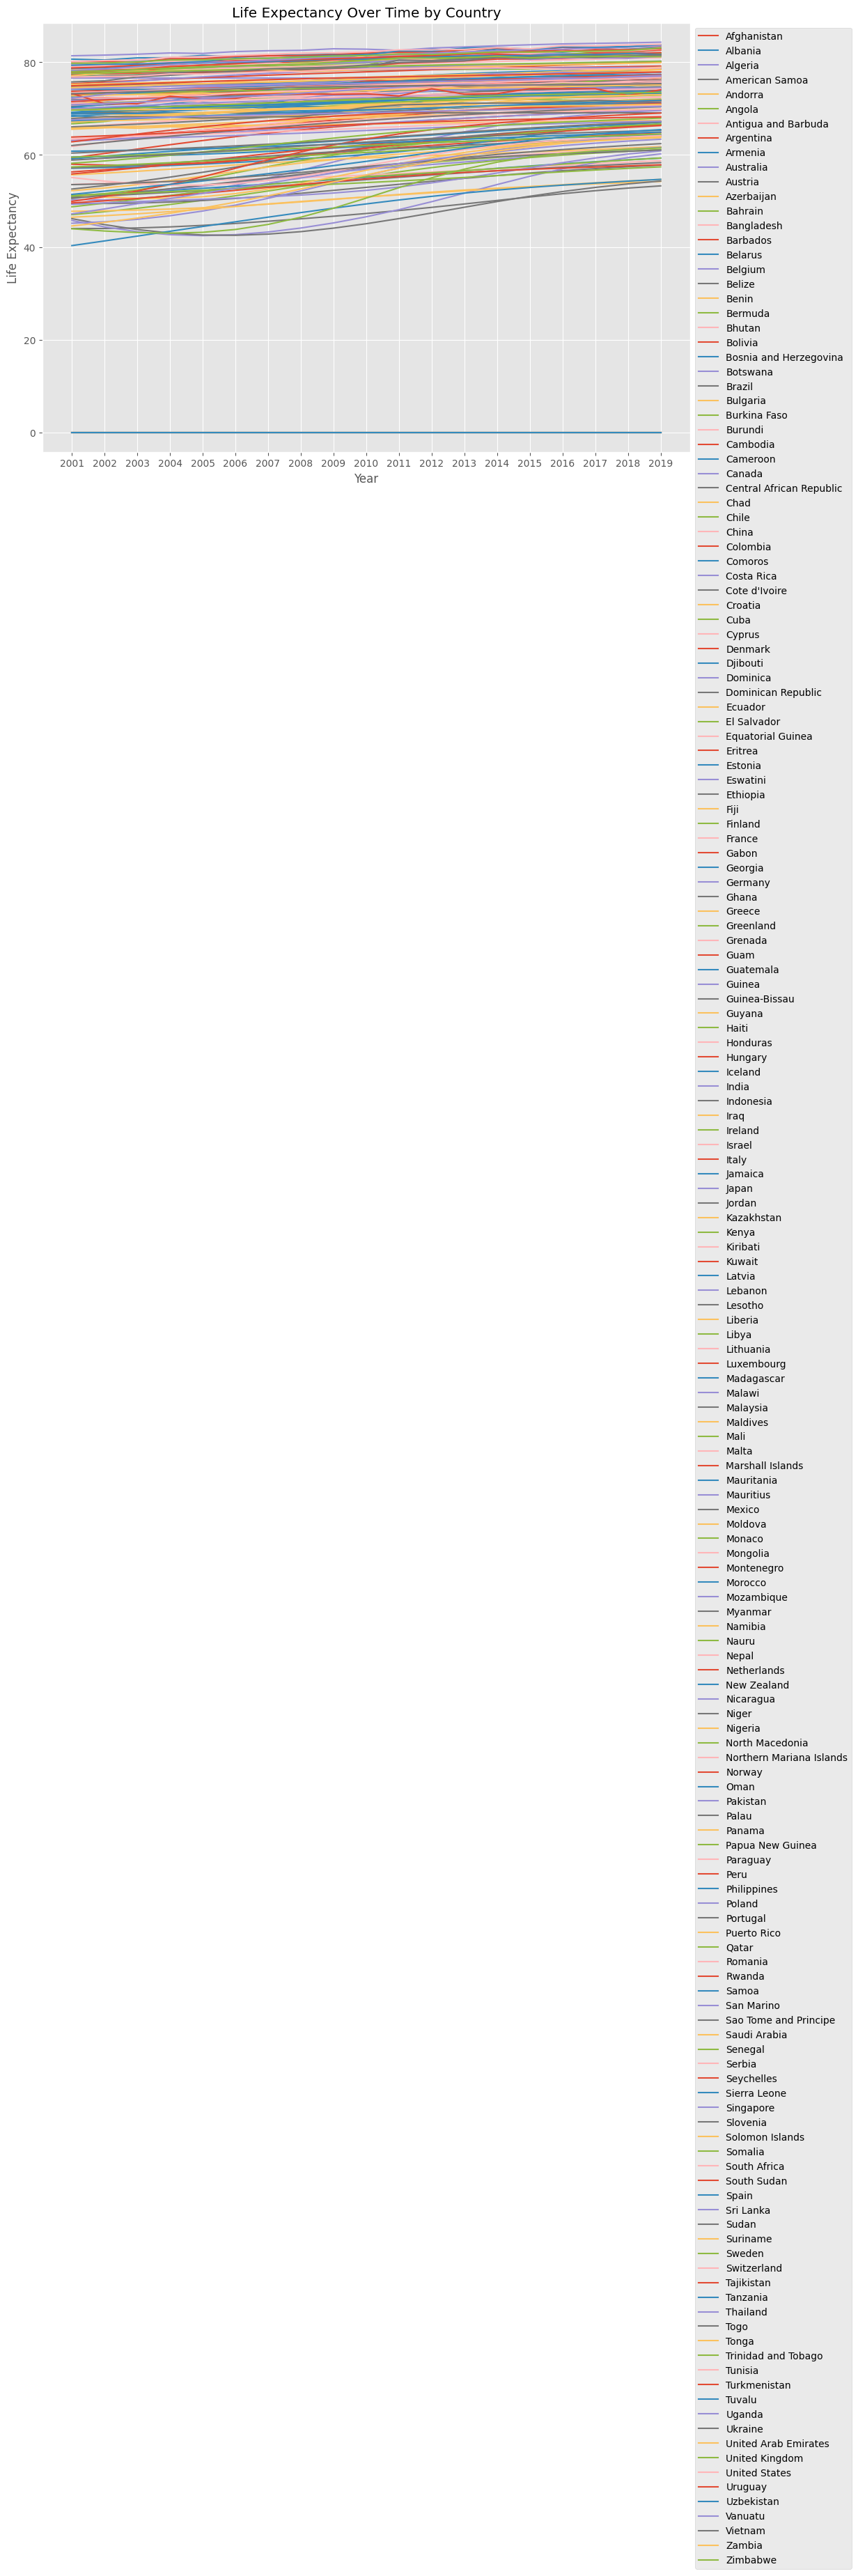

In [19]:
df4 = df3
# Create a figure and axis
plt.figure(figsize=(12, 8))


# Loop through unique countries and plot life expectancy data
unique_countries = df4['Country Name'].unique()
for country in unique_countries:
    country_data = df4[df4['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Life Expectancy World Bank'], label=country)

    
# Set the x-axis ticks to be integer values
plt.xticks(country_data['Year'].astype(int))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time by Country')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.show()

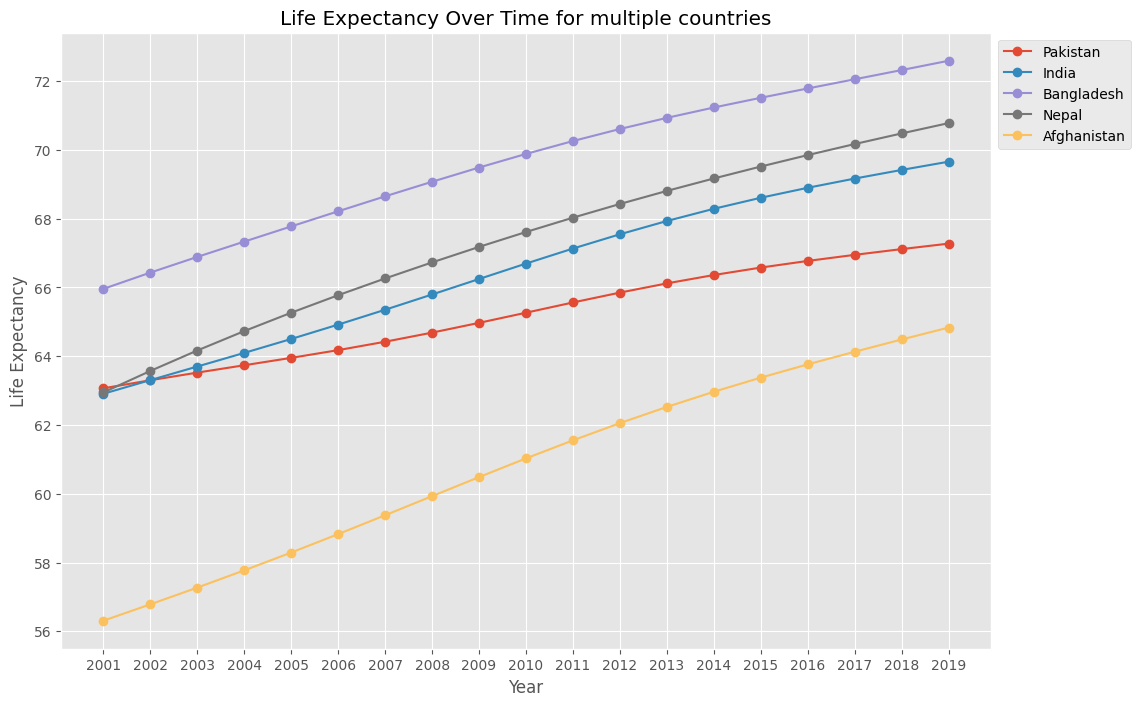

In [20]:
# Create a figure and axis
plt.figure(figsize=(12, 8))


# Define a list of specific countries you want to compare
countries_to_compare = ["Pakistan", "India", "Bangladesh", "Nepal", "Afghanistan"]

# # Filter the data for the specific country 
# country_name = "Pakistan"
# country_data = df4[df4['countries_to_compare'] == country_name]

# # Loop through unique countries and plot life expectancy data
# unique_countries = df4['Country Name'].unique()
for country in countries_to_compare:
    country_data = df4[df4['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Life Expectancy World Bank'], label=country, marker='o', linestyle='-')

    
# # Plot the life expectancy data for the selected country
# plt.plot(country_data['Year'], country_data['Life Expectancy World Bank'], marker='o', linestyle='-')

# Set the x-axis ticks to be integer values
plt.xticks(country_data['Year'].astype(int))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time for multiple countries')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.show()

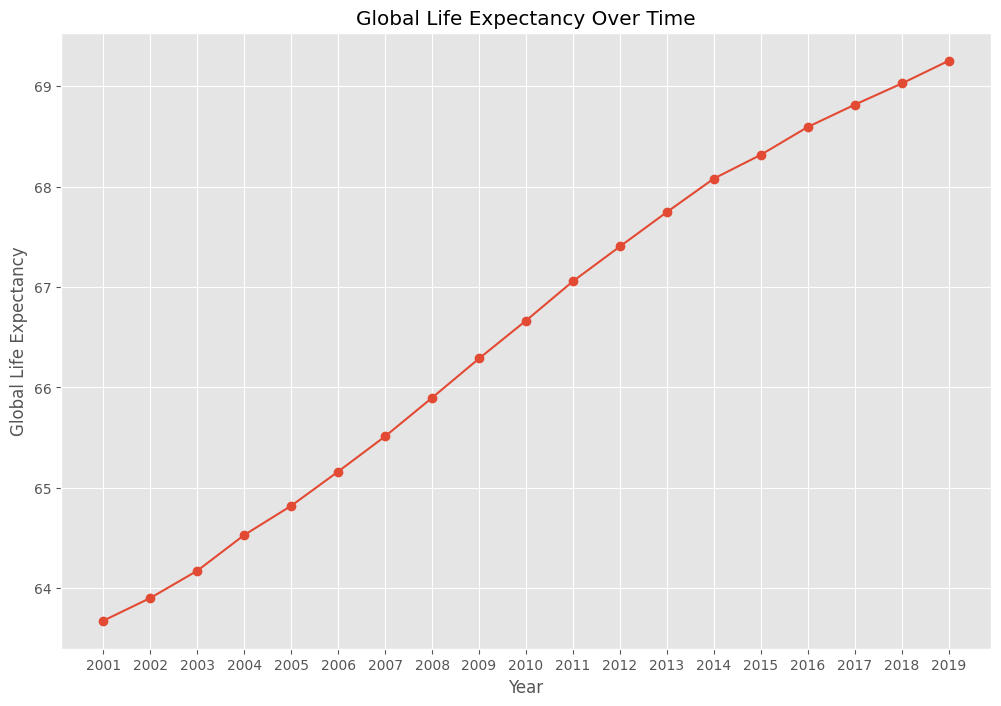

In [21]:
# Group the data by year and calculate the global average life expectancy for each year
global_life_expectancy = df4.groupby('Year')['Life Expectancy World Bank'].mean().reset_index()

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot the global life expectancy data over time
plt.plot(global_life_expectancy['Year'], global_life_expectancy['Life Expectancy World Bank'], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Global Life Expectancy')
plt.title('Global Life Expectancy Over Time')

# Set the x-axis ticks to be integer values
plt.xticks(global_life_expectancy['Year'].unique().astype(int))

# Show the plot
plt.grid(True)
plt.show()

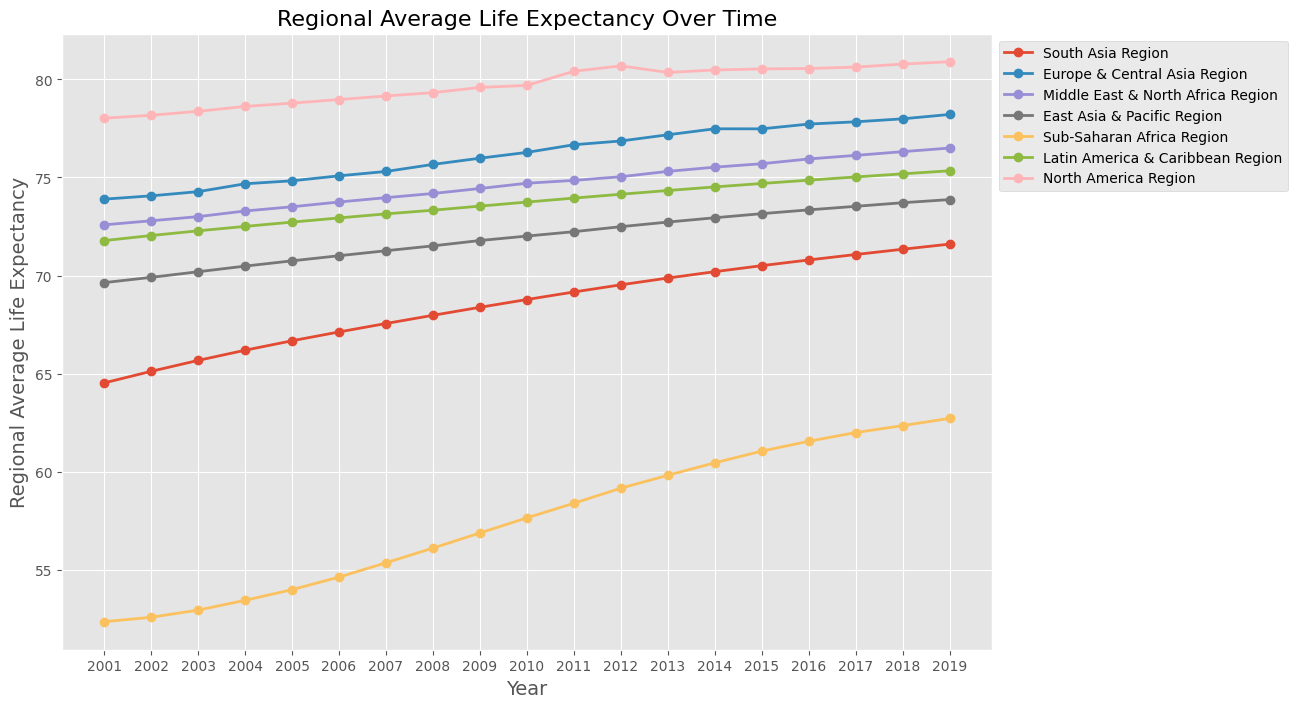

In [22]:
# Get a list of unique regions in the dataset
unique_regions = df4['Region'].unique()

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))

# Loop through the unique regions and plot regional average life expectancy
for region in unique_regions:
    region_data = df[df['Region'] == region]
    regional_avg = region_data.groupby('Year')['Life Expectancy World Bank'].mean().reset_index()
    plt.plot(regional_avg['Year'], regional_avg['Life Expectancy World Bank'], label=f'{region} Region',linewidth=2, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Regional Average Life Expectancy', fontsize=14)
plt.title('Regional Average Life Expectancy Over Time', fontsize=16)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set the x-axis ticks to be integer values
plt.xticks(df['Year'].unique().astype(int))

# Show the plot
plt.grid(True)
plt.show()

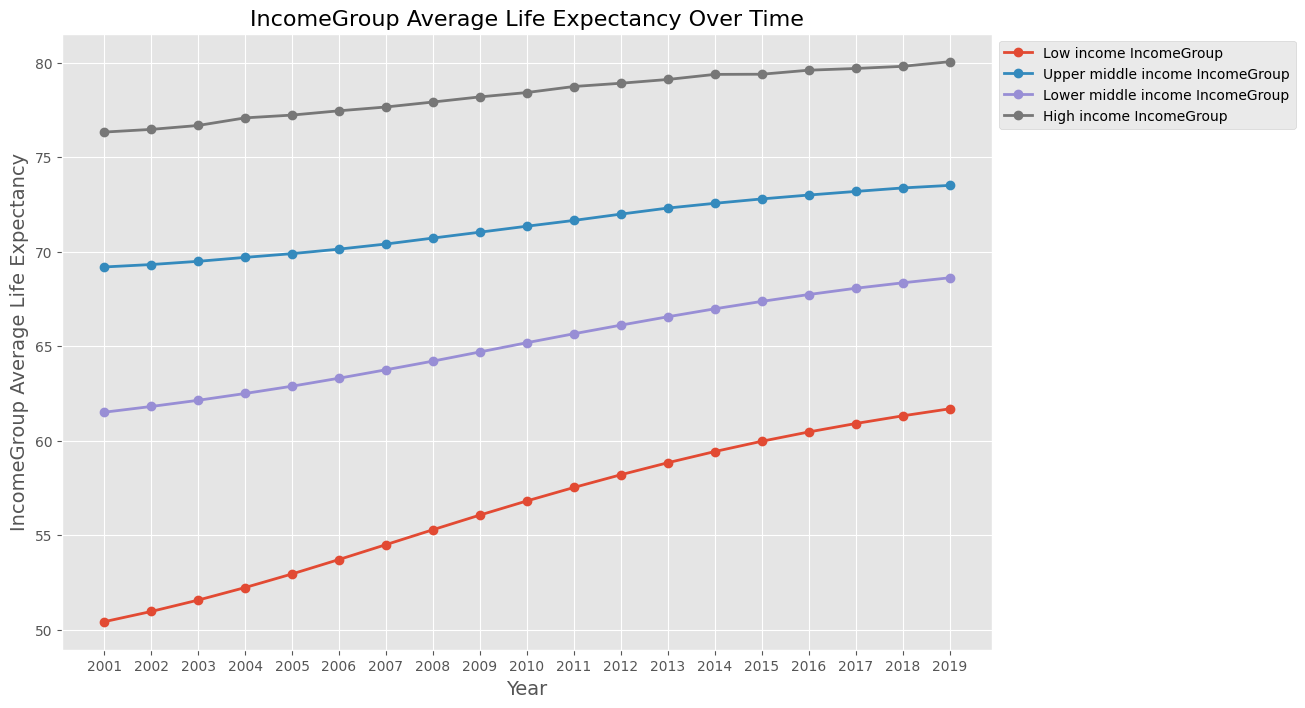

In [23]:
# Get a list of unique regions in the dataset
unique_regions = df4['IncomeGroup'].unique()

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))

# Loop through the unique IncomeGroups and plot average life expectancy
for region in unique_regions:
    region_data = df[df['IncomeGroup'] == region]
    regional_avg = region_data.groupby('Year')['Life Expectancy World Bank'].mean().reset_index()
    plt.plot(regional_avg['Year'], regional_avg['Life Expectancy World Bank'], label=f'{region} IncomeGroup',linewidth=2, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('IncomeGroup Average Life Expectancy', fontsize=14)
plt.title('IncomeGroup Average Life Expectancy Over Time', fontsize=16)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set the x-axis ticks to be integer values
plt.xticks(df['Year'].unique().astype(int))

# Show the plot
plt.grid(True)
plt.show()

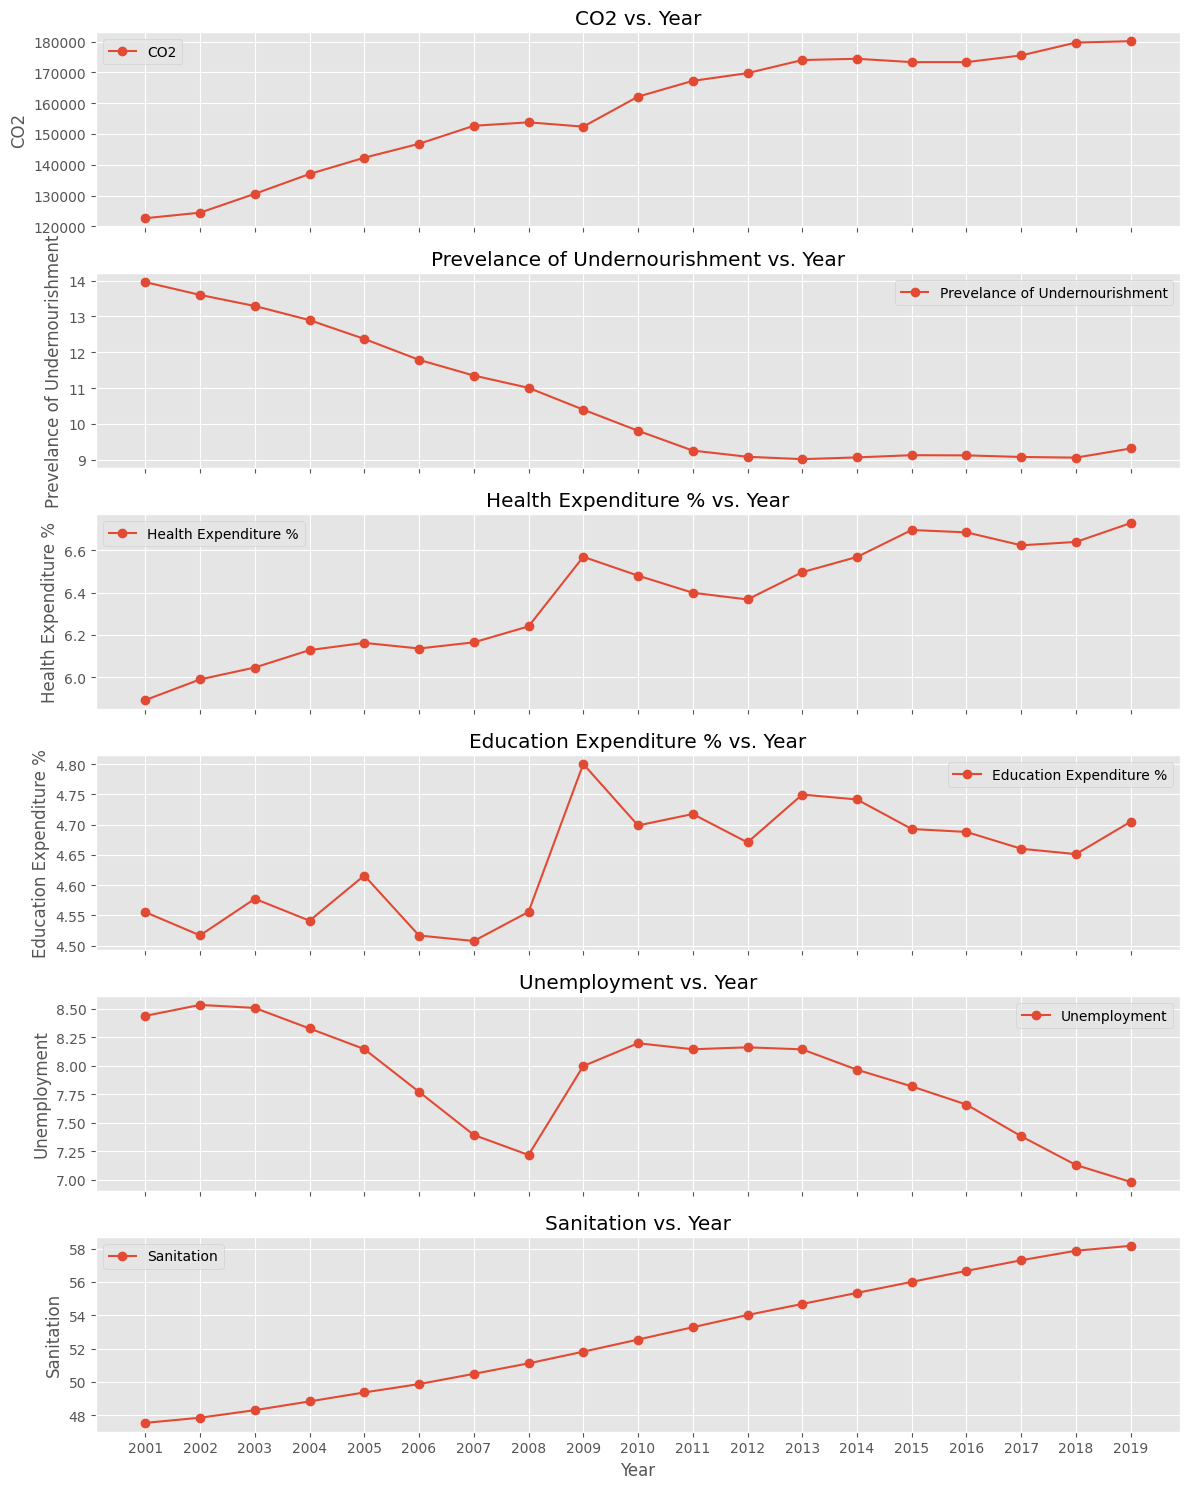

In [24]:
# Select the indicators we want to investigate
indicators = ['CO2', 'Prevelance of Undernourishment', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Sanitation']

# Create a figure and axis for the line chart
fig, axes = plt.subplots(len(indicators), 1, figsize=(12, 15), sharex=True)

# Loop through the selected indicators
for i, indicator in enumerate(indicators):
    # Group the data by 'Year' and calculate the mean of the indicator
    indicator_data = df.groupby('Year')[indicator].mean().reset_index()
    
    # Create a line chart for the indicator vs. year
    ax = axes[i]
    ax.plot(indicator_data['Year'], indicator_data[indicator], marker='o', linestyle='-', label=indicator)
    ax.set_ylabel(indicator)
    ax.set_title(f'{indicator} vs. Year')
    ax.grid(True)
    ax.legend()

# Set labels and title for the x-axis
axes[-1].set_xlabel('Year')

# Set the x-axis ticks to be integer values
plt.xticks(df['Year'].unique().astype(int))

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

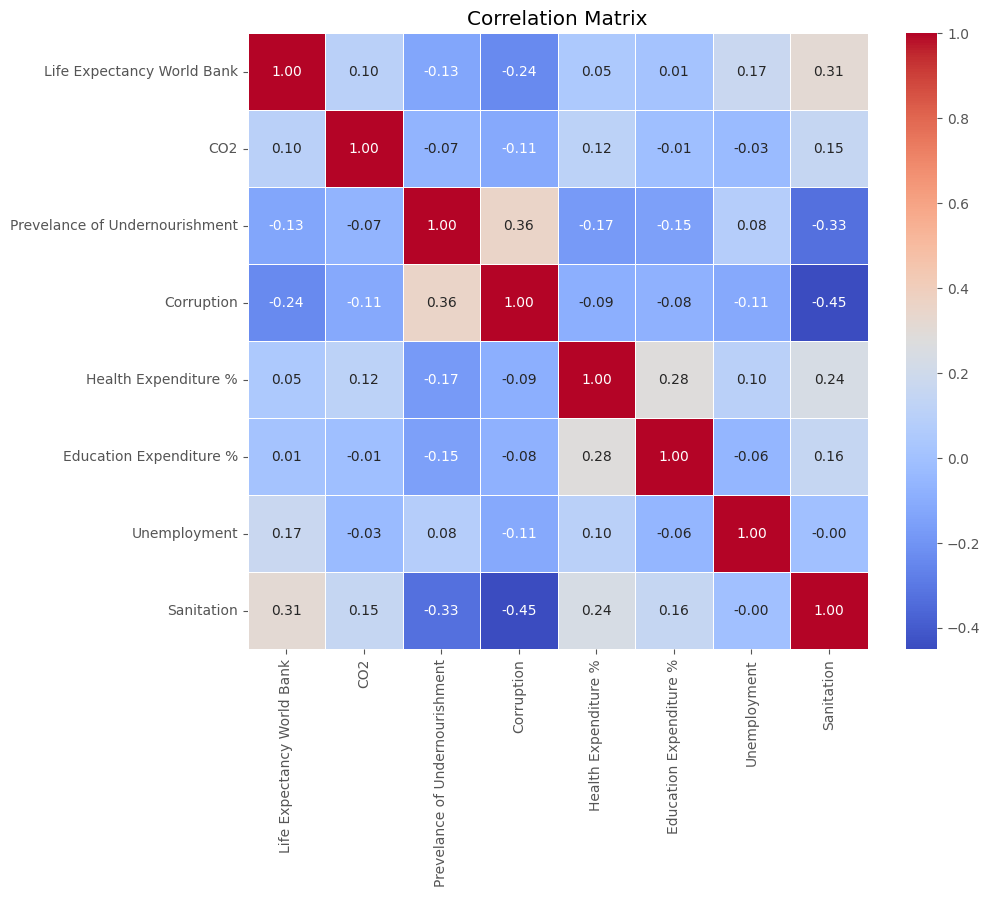

In [25]:
correlation_matrix = df4[['Life Expectancy World Bank', 'CO2', 'Prevelance of Undernourishment', 'Corruption', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Sanitation']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

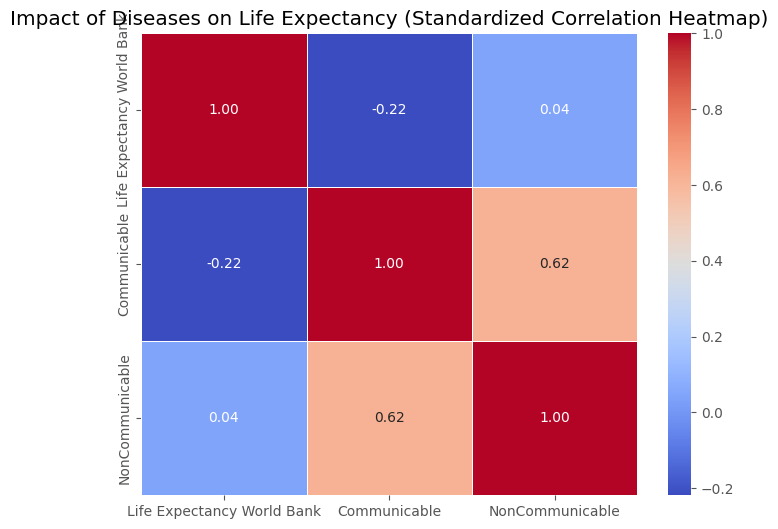

In [26]:
df5 = df4

from sklearn.preprocessing import StandardScaler

# Select the columns of interest
columns_of_interest = ['Life Expectancy World Bank', 'Communicable', 'NonCommunicable']

# Standardize the data columns using StandardScaler
scaler = StandardScaler()
df5[columns_of_interest] = scaler.fit_transform(df[columns_of_interest])

# Calculate the correlation matrix
correlation_matrix = df5[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Impact of Diseases on Life Expectancy (Standardized Correlation Heatmap)')
plt.show()

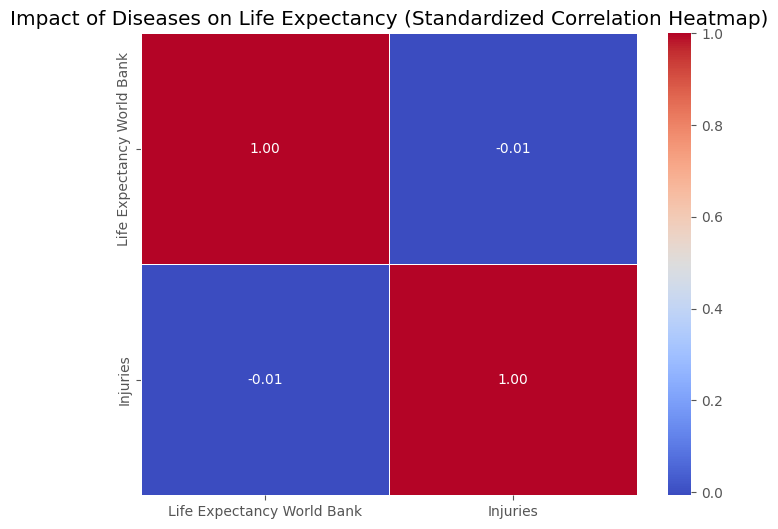

In [27]:
from sklearn.preprocessing import StandardScaler

# Select the columns of interest
columns_of_interest = ['Life Expectancy World Bank', 'Injuries']

# Standardize the data columns using StandardScaler
scaler = StandardScaler()
df5[columns_of_interest] = scaler.fit_transform(df[columns_of_interest])

# Calculate the correlation matrix
correlation_matrix = df5[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Impact of Diseases on Life Expectancy (Standardized Correlation Heatmap)')
plt.show()

Correlation between Injuries and Life Expectancy: -0.01


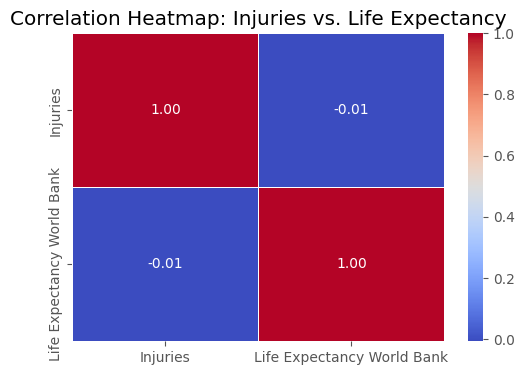

In [28]:
# Calculate the correlation between 'Injuries' and 'Life Expectancy World Bank'
correlation = df5['Injuries'].corr(df5['Life Expectancy World Bank'])

print(f"Correlation between Injuries and Life Expectancy: {correlation:.2f}")

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df5[['Injuries', 'Life Expectancy World Bank']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Injuries vs. Life Expectancy')
plt.show()

# Predictive Analysis

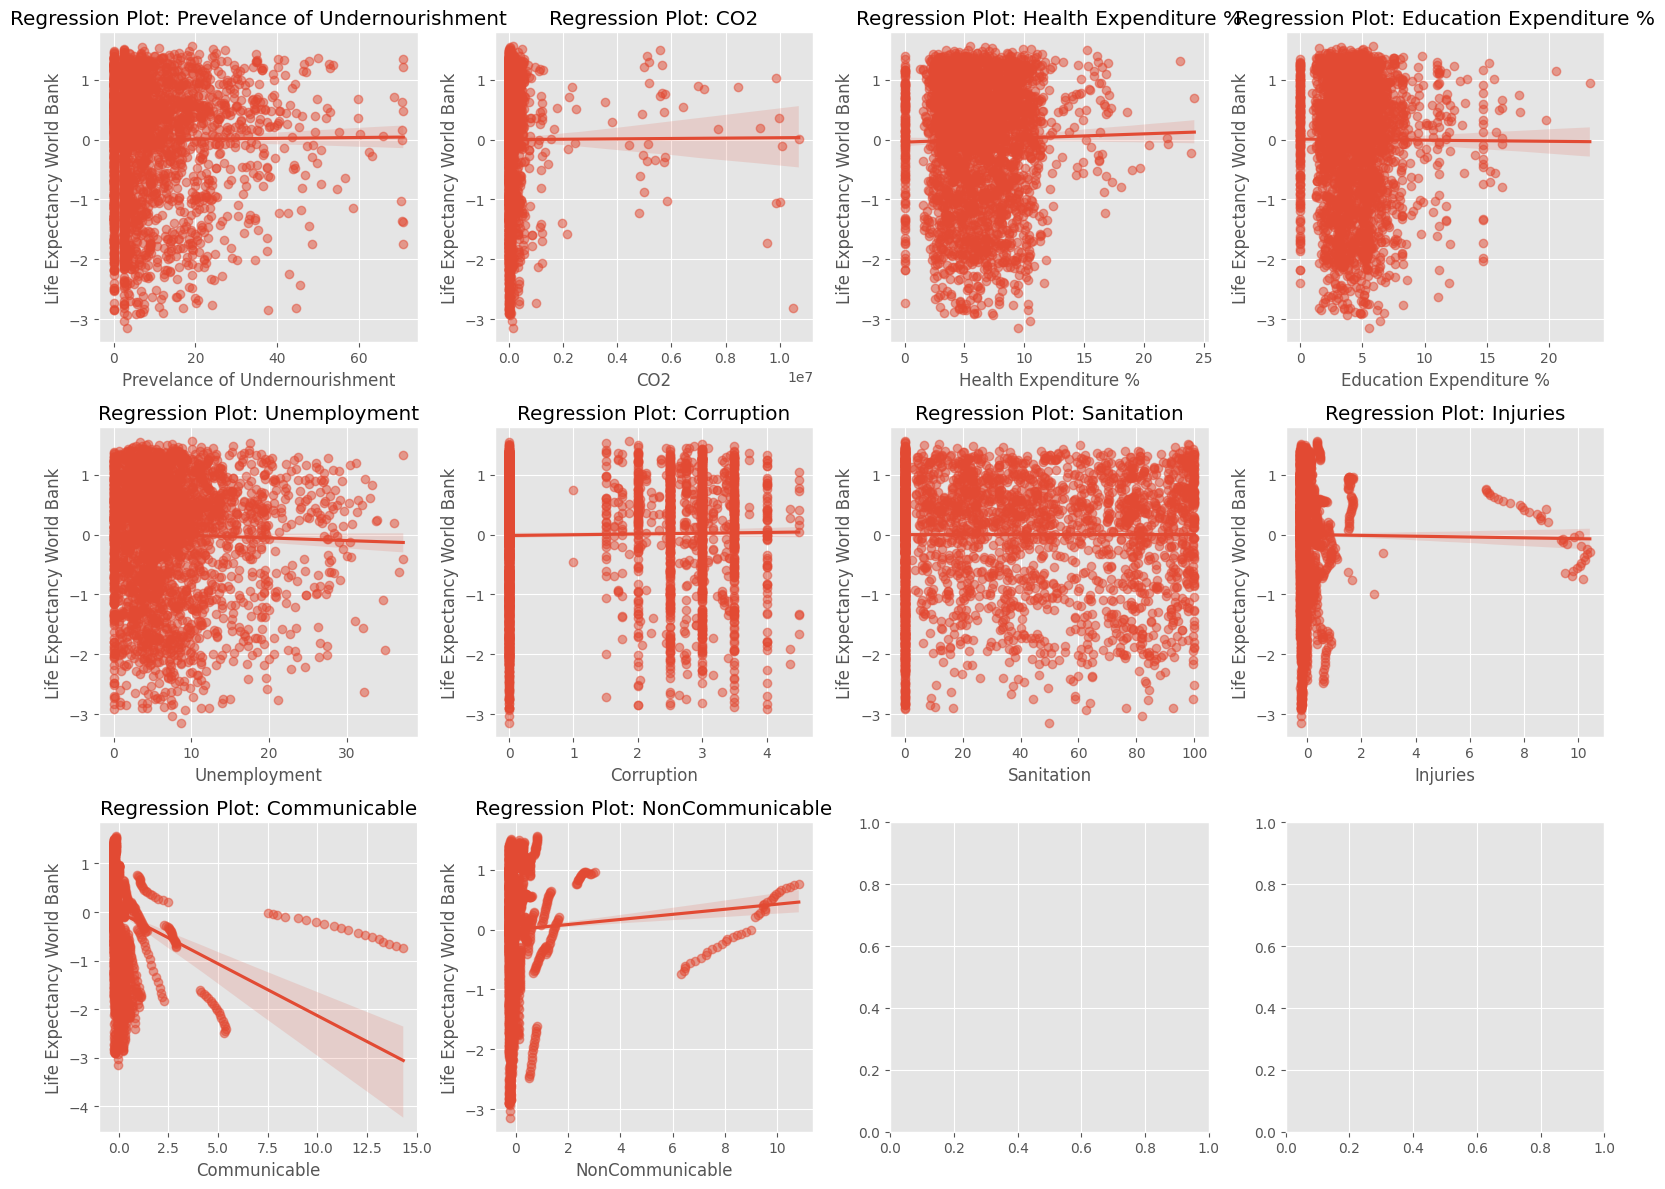

In [29]:
# Select relevant features
selected_features = ['Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']

# Create subplots for each parameter
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

for i, feature in enumerate(selected_features):
    row, col = divmod(i, 4)
    
    # Create a regression plot (regplot) for the current parameter vs. Life Expectancy
    sns.regplot(x=feature, y='Life Expectancy World Bank', data=df5, ax=axes[row, col], scatter_kws={'alpha':0.5})
    axes[row, col].set_title(f'Regression Plot: {feature}')
    
# Adjust the layout and spacing
plt.tight_layout()
plt.show()
